In [1]:
# Calculations carried out for the IT Support dashboard project

# Importing essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the initial dataset as a DataFrame:  df
df = pd.read_csv("Dataset/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


In [2]:
# Quality checking the dataset
# Information about the dataset
print("What is the length of the dataset?")
print(len(df))
print("")
print("Are there any missing values?")
print(df.isna().sum().sort_values())
print("")
print("What is the datatype of each column?")
print(df.dtypes)
print("")
print("How many bytes does each column use?")
print(df.memory_usage())
print("")
print("What are the initial stats of each column?")
print(df.describe())
print("")
print("What is the shape of my table?")
print(df.shape)

What is the length of the dataset?
28587

Are there any missing values?
body            0
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
answer          7
tag_2          13
tag_3         136
tag_4        3058
subject      3838
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64

What is the datatype of each column?
subject     object
body        object
answer      object
type        object
queue       object
priority    object
language    object
version      int64
tag_1       object
tag_2       object
tag_3       object
tag_4       object
tag_5       object
tag_6       object
tag_7       object
tag_8       object
dtype: object

How many bytes does each column use?
Index          132
subject     228696
body        228696
answer      228696
type        228696
queue       228696
priority    228696
language    228696
version     228696
tag_1       228696
tag_2       228696
tag_3       228696
tag_4

In [3]:
# Loop to extract all unique values from each column in df
# The goal is to see what data each column holds without manually processing the full table
for column in df.columns:
    unique_values = df[column].sort_values(ascending=True).unique()
    length = len(unique_values)
    print(f"There were {length} unique values in {column}: {unique_values}")
    print("")

There were 24750 unique values in subject: [' Assistance Request'
 ' Bitte um Ausführliche Informationen zur Datenaufbereitungsdienstleistung'
 ' Datenschutzverletzung in Krankenhaus-Systemen ' ...
 'Übersicht der digitalen Kampagnen'
 'Überwachung medizinischer Daten in Krankenhaus-Systemen' nan]

There were 28587 unique values in body: [' Assistance Requested' ' Assistance Required' ' Assistance needed' ...
 'wishes to enhance data analysis tools for better optimization of decision-making processes for financial strategies to achieve better results.'
 'Änderungen in den Datenanalyseberichten wurden bemerkt. Obwohl die Berichte neu ausgeführt wurden, bestehen weiterhin Probleme mit den Dateneingaben. Neueste Software-Updates könnten der Grund sein.'
 'Überarbeitung der Datenanalyse, um Investitionen zu verbessern']

There were 28581 unique values in answer: [' Nehmen wir diesen Fall ernst. Bitte bereiten Sie zusätzliche Details des Vorfalls vor und rufen Sie uns unter <tel_num> an. Wi

In [4]:
# As the dataset contains a mix of German and English records, I'd like to see if I can focus my reporting on just the English records
# I'm doing this because I'd like to delve deeper into the QA-style responses later and I can only read and understand English
# Create English-only subset
df["language"] = df["language"].astype(str).str.lower().str.strip()
df_en = df[df["language"] == "en"].copy()
print("English-only rows:", len(df_en))
print("Absolute reduction:", len(df) - len(df_en), "rows")
print("Percent reduction: {:.2f}%".format(100 * (1 - len(df_en) / len(df))))

English-only rows: 16338
Absolute reduction: 12249 rows
Percent reduction: 42.85%


In [ ]:
# Helper: produce comparison table for a categorical column
def compare_distribution(col, top_n=50):
    full_series = df[col].fillna("<<MISSING>>").astype(str).str.strip()
    en_series = df_en[col].fillna("<<MISSING>>").astype(str).str.strip()
    full_counts = full_series.value_counts(dropna=False)
    en_counts = en_series.value_counts(dropna=False)
    # combine categories present in either
    all_cats = sorted(
        set(full_counts.index).union(set(en_counts.index)),
        key=lambda x: (-full_counts.get(x, 0), str(x)),
    )
    rows = []
    for c in all_cats[:top_n]:
        fct = int(full_counts.get(c, 0))
        ect = int(en_counts.get(c, 0))
        f_pct = fct / full_counts.sum() if full_counts.sum() > 0 else 0
        e_pct = ect / en_counts.sum() if en_counts.sum() > 0 else 0
        abs_diff = e_pct - f_pct
        rel_diff = (abs_diff / f_pct) if f_pct != 0 else np.nan
        rows.append((c, fct, ect, f_pct, e_pct, abs_diff, rel_diff))
    result = pd.DataFrame(
        rows,
        columns=[
            col,
            "full_count",
            "en_count",
            "full_pct",
            "en_pct",
            "abs_pct_diff",
            "rel_pct_diff",
        ],
    )
    result = result.sort_values(by="full_count", ascending=False).reset_index(drop=True)
    return result


# Compute distributions and summary metrics
distributions = {}
summary = []
COMPARE_COLS = ["priority", "type", "queue"]

for col in COMPARE_COLS:
    if col not in df.columns:
        print(f"WARNING: column '{col}' not in dataset — skipping.")
        continue
    dist = compare_distribution(col, top_n=200)
    distributions[col] = dist
    # L1 metric (sum absolute proportion diffs)
    L1 = dist["abs_pct_diff"].abs().sum()
    idx_max = dist["abs_pct_diff"].abs().idxmax()
    max_cat = dist.loc[idx_max, col]
    max_abs = dist.loc[idx_max, "abs_pct_diff"]
    summary.append(
        {
            "column": col,
            "L1_total_abs_pct_diff": L1,
            "max_diff_category": max_cat,
            "max_abs_pct_diff": max_abs,
        }
    )
    # show the small table
    display(
        dist.style.format(
            {
                "full_count": "{:,}",
                "en_count": "{:,}",
                "full_pct": "{:.3%}",
                "en_pct": "{:.3%}",
                "abs_pct_diff": "{:.3%}",
                "rel_pct_diff": "{:.1%}",
            }
        )
    )

summary_df = pd.DataFrame(summary)
print("\nSummary of distribution shifts:")
display(
    summary_df.style.format(
        {"L1_total_abs_pct_diff": "{:.3%}", "max_abs_pct_diff": "{:.3%}"}
    )
)

,priority,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,medium,"11,515","6,618",40.281%,40.507%,0.226%,0.6%
1,high,"11,178","6,346",39.102%,38.842%,-0.260%,-0.7%
2,low,"5,894","3,374",20.618%,20.651%,0.033%,0.2%


,type,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Incident,"11,466","6,571",40.109%,40.219%,0.110%,0.3%
1,Request,"8,187","4,665",28.639%,28.553%,-0.086%,-0.3%
2,Problem,"6,012","3,397",21.031%,20.792%,-0.239%,-1.1%
3,Change,"2,922","1,705",10.221%,10.436%,0.214%,2.1%


,queue,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Technical Support,"8,362","4,737",29.251%,28.994%,-0.257%,-0.9%
1,Product Support,"5,252","3,073",18.372%,18.809%,0.437%,2.4%
2,Customer Service,"4,268","2,410",14.930%,14.751%,-0.179%,-1.2%
3,IT Support,"3,433","1,942",12.009%,11.886%,-0.123%,-1.0%
4,Billing and Payments,"2,788","1,595",9.753%,9.763%,0.010%,0.1%
5,Returns and Exchanges,"1,437",820,5.027%,5.019%,-0.008%,-0.2%
6,Service Outages and Maintenance,"1,148",664,4.016%,4.064%,0.048%,1.2%
7,Sales and Pre-Sales,918,513,3.211%,3.140%,-0.071%,-2.2%
8,Human Resources,576,348,2.015%,2.130%,0.115%,5.7%
9,General Inquiry,405,236,1.417%,1.444%,0.028%,2.0%



Summary of distribution shifts:


,column,L1_total_abs_pct_diff,max_diff_category,max_abs_pct_diff
0,priority,0.519%,high,-0.260%
1,type,0.649%,Problem,-0.239%
2,queue,1.276%,Product Support,0.437%


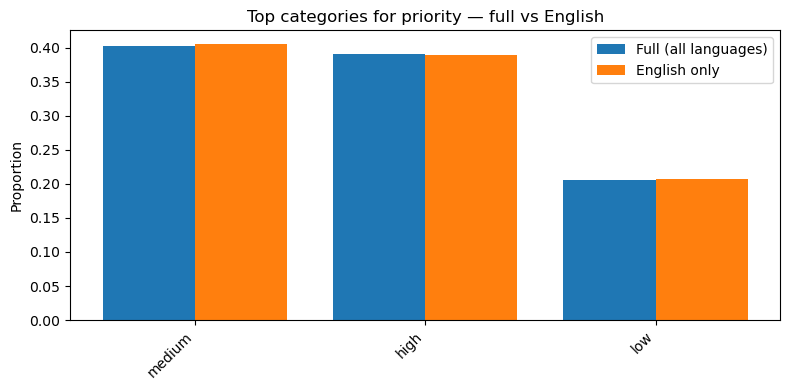

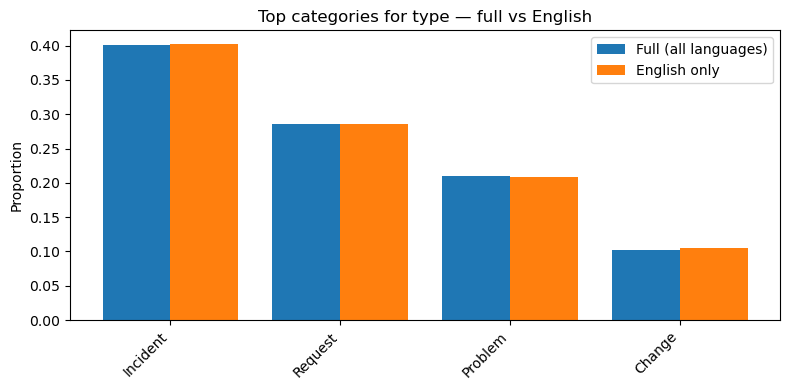

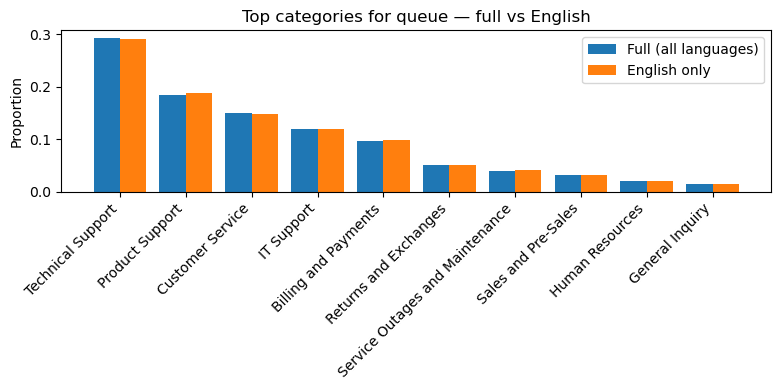

In [6]:
# Visual quick checks (bar charts of full vs en proportions) for each column
for col, tbl in distributions.items():
    fig, ax = plt.subplots(figsize=(8, 4))
    # use top 10 categories by full_count for readability
    plot_tbl = tbl.head(10).copy()
    x = np.arange(len(plot_tbl))
    ax.bar(x - 0.2, plot_tbl["full_pct"], width=0.4, label="Full (all languages)")
    ax.bar(x + 0.2, plot_tbl["en_pct"], width=0.4, label="English only")
    ax.set_xticks(x)
    ax.set_xticklabels(plot_tbl[col], rotation=45, ha="right")
    ax.set_ylabel("Proportion")
    ax.set_title(f"Top categories for {col} — full vs English")
    ax.legend()
    plt.tight_layout()
    plt.show()

In [8]:
# Statistical tests (chi-square + Cramer's V) if scipy is present
try:
    import scipy.stats as stats

    print("\nscipy available — computing chi-square and Cramer's V for each column.")

    def cramers_v(chi2, n, r, k):
        return np.sqrt(chi2 / (n * min(r - 1, k - 1)))

    tests = []
    for col, tbl in distributions.items():
        # contingency table: rows=categories, cols = counts [full, en]
        ct = tbl[["full_count", "en_count"]].astype(int).values
        chi2, p, dof, expected = stats.chi2_contingency(ct, correction=False)
        n = int(ct.sum())
        r, k = ct.shape
        v = cramers_v(chi2, n, r, k)
        tests.append(
            {
                "column": col,
                "chi2": chi2,
                "p_value": p,
                "dof": dof,
                "n": n,
                "cramers_v": v,
            }
        )
    tests_df = pd.DataFrame(tests)
    display(
        tests_df.style.format(
            {"chi2": "{:.3f}", "p_value": "{:.2e}", "cramers_v": "{:.3f}"}
        )
    )
    print("\nInterpretation guidance for Cramer's V (rule-of-thumb):")
    print(
        "  0.00-0.10: negligible, 0.10-0.20: weak, 0.20-0.40: moderate, >0.40: strong association"
    )
except Exception as e:
    print("\nscipy not available — statistical tests skipped.")
    print(
        "To run chi-square tests, install scipy (pip install scipy) and re-run this cell."
    )
    print(
        "You can still rely on L1 and the absolute differences to report how distributions shifted."
    )



scipy available — computing chi-square and Cramer's V for each column.


,column,chi2,p_value,dof,n,cramers_v
0,priority,0.317,8.53e-01,2,44925,0.003
1,type,0.804,8.48e-01,3,44925,0.004
2,queue,2.616,9.78e-01,9,44925,0.008



Interpretation guidance for Cramer's V (rule-of-thumb):
  0.00-0.10: negligible, 0.10-0.20: weak, 0.20-0.40: moderate, >0.40: strong association


All observed differences fall well below thresholds of practical concern (Cramér’s V < 0.1, total L1 < 1 %), confirming that subsequent analyses using English-only data are robust against language-sampling bias.